# TEST

Dummy notebook to test functions

In [2]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Test prepData

Import data from example run and prepare it for further analysis.

In [3]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


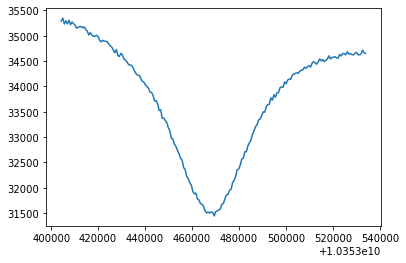

In [4]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

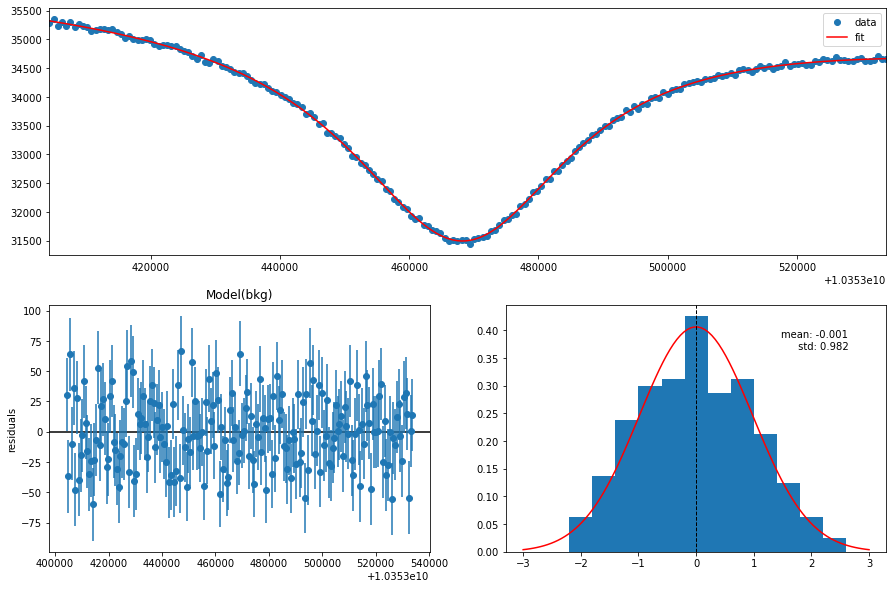

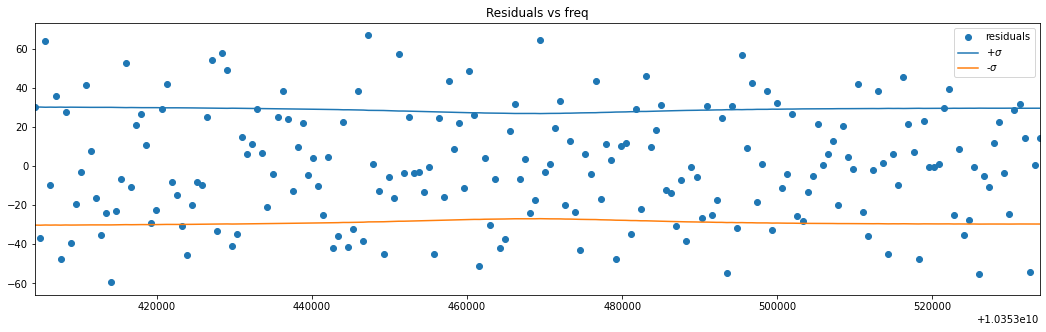

In [5]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [6]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

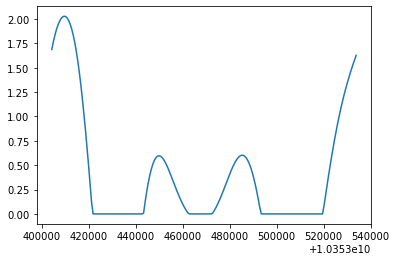

In [7]:
plt.plot(freq, mu_fit)

Check fit results for maximum $\mu$ obtained.

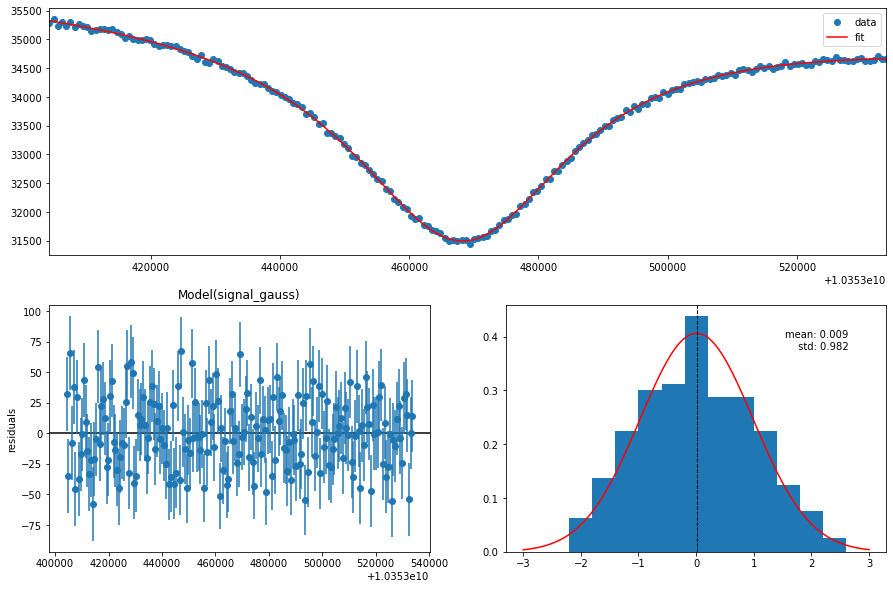

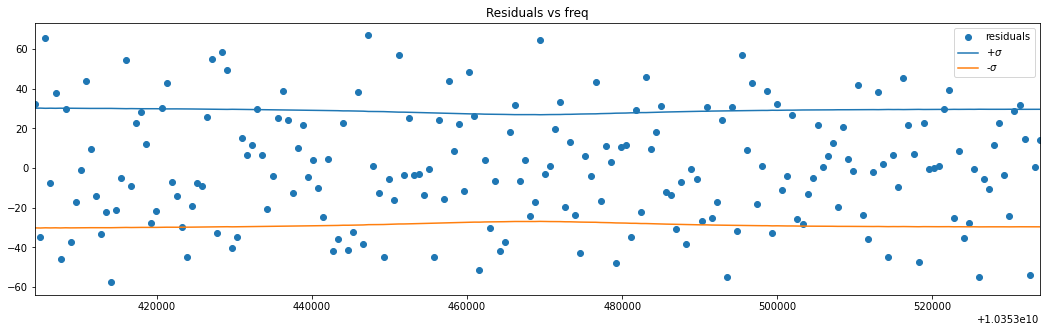

In [8]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

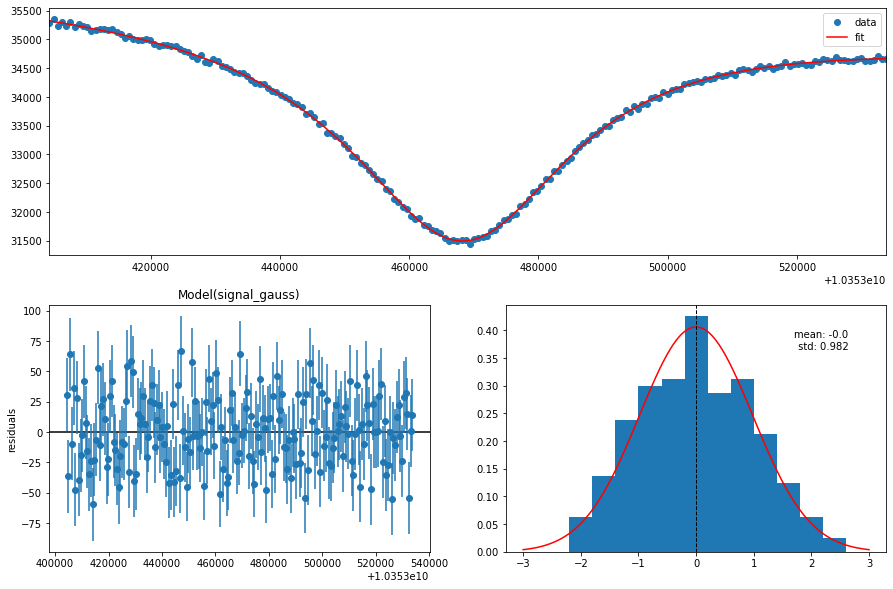

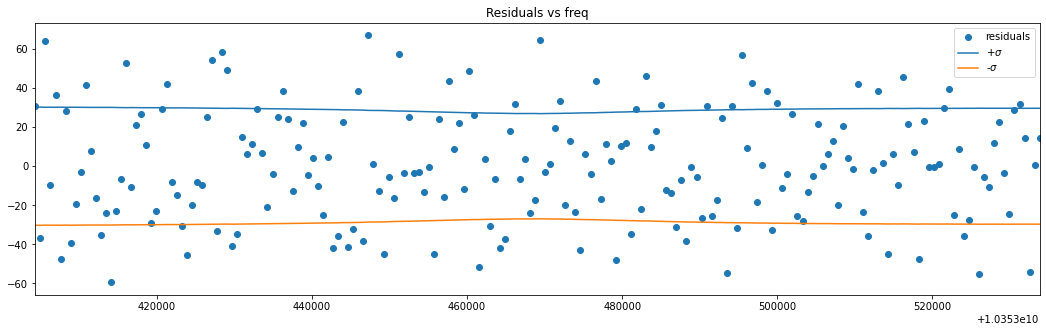

In [9]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.010000323595249938

### Significance

Compute significance as a function of the center of the signal.

In [10]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


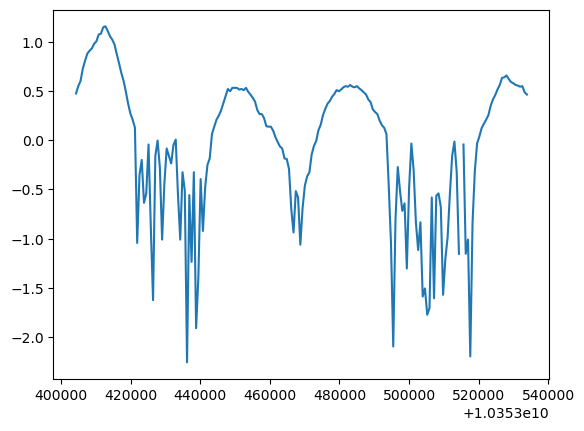

In [11]:
plt.plot(freq, z_tot)

In [12]:
np.max(z_tot), freq[np.argmax(z_tot)]

(1.1552208466119516, 10353412760.416666)

Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


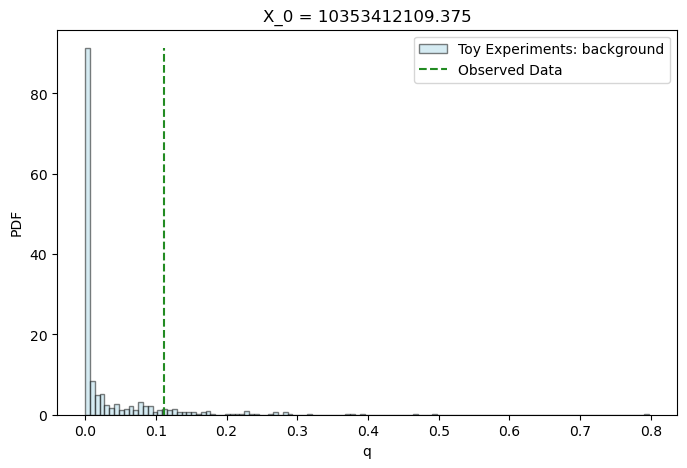

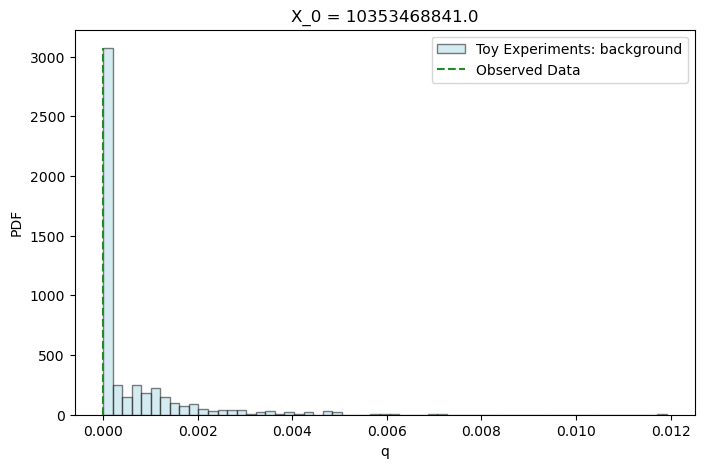

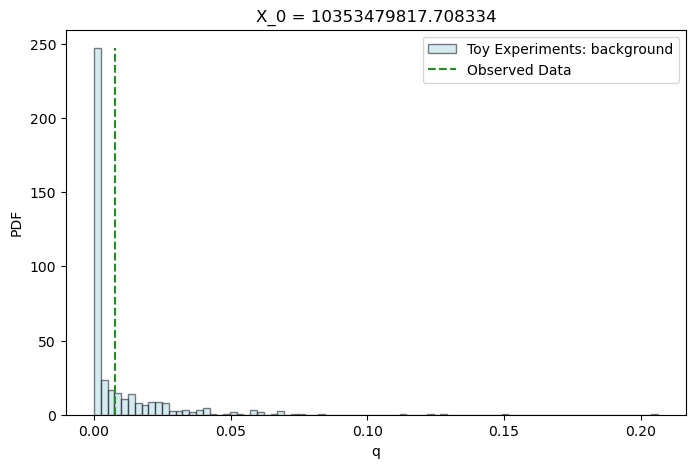

In [13]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=500,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

In [14]:
z

array([ 1.28155157, -0.88529045,  0.56510845])

In [14]:
np.array([range(0, 50,5)])

array([[ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]])

### Confidence Interval

Compute $\mu^{95\% CL}$ for the frequency where we have the maximum of $\hat{\mu}$.

In [29]:
mu_fix=np.array([67,56,50,44,33,26,15])
x0=freq[range(0, 50,5)].values

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  67    q(mu)_obs = 68.57463876200222 
p_mu = 0.007   p_b = 0.728   ratio = 0.009615384615384616 

Mu:  56    q(mu)_obs = 47.41653257013127 
p_mu = 0.018   p_b = 0.728   ratio = 0.024725274725274724 

Mu:  50    q(mu)_obs = 37.512537402314365 
p_mu = 0.04   p_b = 0.728   ratio = 0.05494505494505495 

Mu:  44    q(mu)_obs = 28.76516287268919 
p_mu = 0.067   p_b = 0.728   ratio = 0.09203296703296704 

Mu:  33    q(mu)_obs = 15.73553355242234 
p_mu = 0.165   p_b = 0.728   ratio = 0.22664835164835168 

Mu:  26    q(mu)_obs = 9.472477826231398 
p_mu = 0.256   p_b = 0.728   ratio = 0.3516483516483517 

Mu:  15    q(mu)_obs = 2.8225311305529885 
p_mu = 0.45   p_b = 0.728   ratio = 0.6181318681318682 



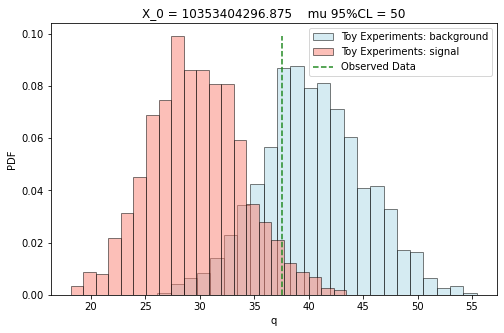

Mu:  67    q(mu)_obs = 90.36056979890441 
p_mu = 0.011   p_b = 0.842   ratio = 0.013064133016627079 

Mu:  56    q(mu)_obs = 62.37450563713719 
p_mu = 0.045   p_b = 0.843   ratio = 0.05338078291814947 

Mu:  50    q(mu)_obs = 49.284092023659014 
p_mu = 0.083   p_b = 0.843   ratio = 0.09845788849347568 

Mu:  44    q(mu)_obs = 37.73049518382663 
p_mu = 0.14   p_b = 0.843   ratio = 0.16607354685646503 

Mu:  33    q(mu)_obs = 20.544843637796248 
p_mu = 0.297   p_b = 0.843   ratio = 0.35231316725978645 

Mu:  26    q(mu)_obs = 12.304132368816909 
p_mu = 0.415   p_b = 0.843   ratio = 0.4922894424673784 

Mu:  15    q(mu)_obs = 3.5964122242016856 
p_mu = 0.592   p_b = 0.842   ratio = 0.7030878859857482 



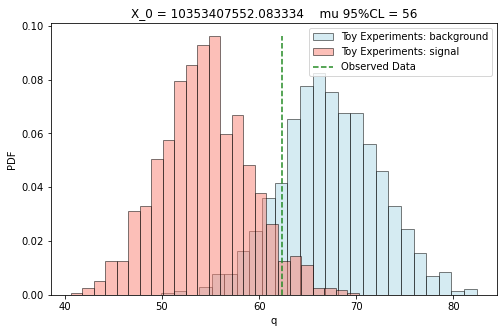

Mu:  67    q(mu)_obs = 108.53565112726096 
p_mu = 0.05   p_b = 0.904   ratio = 0.05530973451327434 

Mu:  56    q(mu)_obs = 74.90601791126187 
p_mu = 0.12   p_b = 0.904   ratio = 0.1327433628318584 

Mu:  50    q(mu)_obs = 59.17716198988296 
p_mu = 0.172   p_b = 0.904   ratio = 0.1902654867256637 

Mu:  44    q(mu)_obs = 45.29597886443298 
p_mu = 0.264   p_b = 0.904   ratio = 0.2920353982300885 

Mu:  33    q(mu)_obs = 24.651386520654114 
p_mu = 0.423   p_b = 0.904   ratio = 0.46792035398230086 

Mu:  26    q(mu)_obs = 14.754822187667742 
p_mu = 0.533   p_b = 0.904   ratio = 0.5896017699115045 

Mu:  15    q(mu)_obs = 4.303189317778106 
p_mu = 0.729   p_b = 0.903   ratio = 0.8073089700996677 



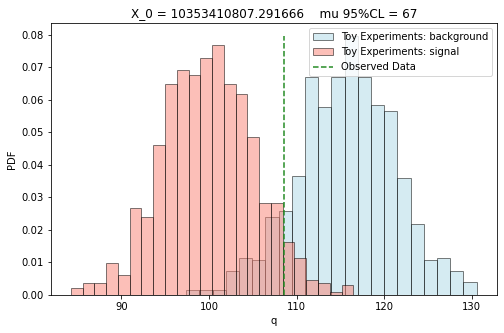

Mu:  67    q(mu)_obs = 121.93440841222196 
p_mu = 0.037   p_b = 0.883   ratio = 0.04190260475651189 

Mu:  56    q(mu)_obs = 84.28667046135388 
p_mu = 0.09   p_b = 0.883   ratio = 0.10192525481313702 

Mu:  50    q(mu)_obs = 66.66613783816183 
p_mu = 0.161   p_b = 0.883   ratio = 0.1823329558323896 

Mu:  44    q(mu)_obs = 51.105260866256 
p_mu = 0.195   p_b = 0.883   ratio = 0.22083805209513024 

Mu:  33    q(mu)_obs = 27.9323327760776 
p_mu = 0.337   p_b = 0.883   ratio = 0.38165345413363533 

Mu:  26    q(mu)_obs = 16.798536424638087 
p_mu = 0.479   p_b = 0.883   ratio = 0.5424688561721404 

Mu:  15    q(mu)_obs = 4.987513419435118 
p_mu = 0.675   p_b = 0.883   ratio = 0.7644394110985278 



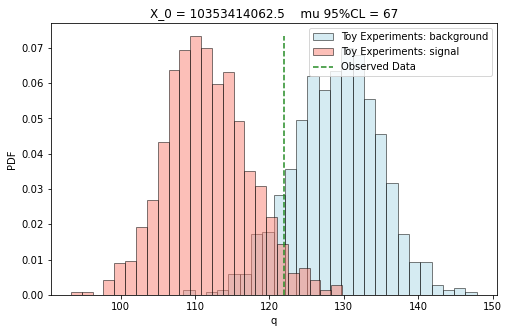

Mu:  67    q(mu)_obs = 131.49870410972608 
p_mu = 0.003   p_b = 0.765   ratio = 0.00392156862745098 

Mu:  56    q(mu)_obs = 91.222900030657 
p_mu = 0.012   p_b = 0.765   ratio = 0.01568627450980392 

Mu:  50    q(mu)_obs = 72.34240549205447 
p_mu = 0.013   p_b = 0.765   ratio = 0.01699346405228758 

Mu:  44    q(mu)_obs = 55.64415359757709 
p_mu = 0.036   p_b = 0.765   ratio = 0.04705882352941176 

Mu:  33    q(mu)_obs = 30.70467376011038 
p_mu = 0.129   p_b = 0.765   ratio = 0.16862745098039217 

Mu:  26    q(mu)_obs = 18.661579651315833 
p_mu = 0.21   p_b = 0.765   ratio = 0.2745098039215686 

Mu:  15    q(mu)_obs = 5.759649738521148 
p_mu = 0.457   p_b = 0.764   ratio = 0.5981675392670157 



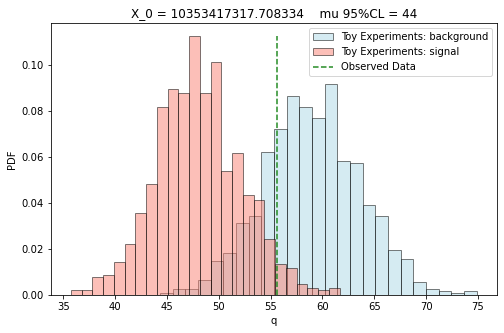

Mu:  67    q(mu)_obs = 138.90023222795094 
p_mu = 0.0   p_b = 0.567   ratio = 0.0 

Mu:  56    q(mu)_obs = 96.86110179038587 
p_mu = 0.0   p_b = 0.566   ratio = 0.0 

Mu:  50    q(mu)_obs = 77.10823988241009 
p_mu = 0.0   p_b = 0.566   ratio = 0.0 

Mu:  44    q(mu)_obs = 59.600803792611714 
p_mu = 0.005   p_b = 0.566   ratio = 0.0088339222614841 

Mu:  33    q(mu)_obs = 33.34203502319883 
p_mu = 0.025   p_b = 0.566   ratio = 0.0441696113074205 

Mu:  26    q(mu)_obs = 20.57012194638014 
p_mu = 0.064   p_b = 0.566   ratio = 0.11307420494699648 

Mu:  15    q(mu)_obs = 6.697060478474441 
p_mu = 0.203   p_b = 0.566   ratio = 0.35865724381625447 



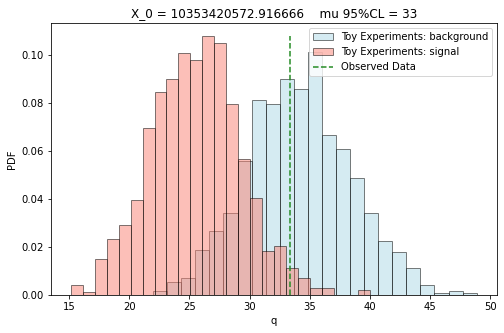

Mu:  67    q(mu)_obs = 145.17021617884666 
p_mu = 0.0   p_b = 0.38   ratio = 0.0 

Mu:  56    q(mu)_obs = 101.81669955267489 
p_mu = 0.0   p_b = 0.38   ratio = 0.0 

Mu:  50    q(mu)_obs = 81.39387559047304 
p_mu = 0.0   p_b = 0.38   ratio = 0.0 

Mu:  44    q(mu)_obs = 63.249665099832555 
p_mu = 0.0   p_b = 0.38   ratio = 0.0 

Mu:  33    q(mu)_obs = 35.90974569815717 
p_mu = 0.007   p_b = 0.381   ratio = 0.01837270341207349 

Mu:  26    q(mu)_obs = 22.508007183466134 
p_mu = 0.015   p_b = 0.381   ratio = 0.03937007874015748 

Mu:  15    q(mu)_obs = 7.736743216926243 
p_mu = 0.079   p_b = 0.381   ratio = 0.2073490813648294 



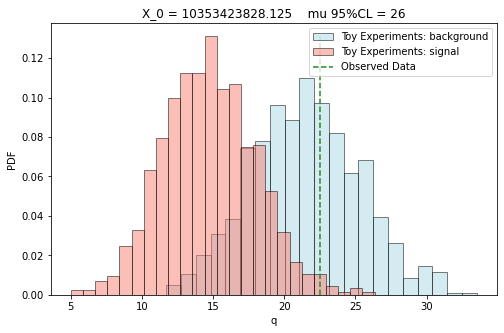

Mu:  67    q(mu)_obs = 150.26859974510148 
p_mu = 0.0   p_b = 0.264   ratio = 0.0 

Mu:  56    q(mu)_obs = 105.88739992354044 
p_mu = 0.0   p_b = 0.264   ratio = 0.0 

Mu:  50    q(mu)_obs = 84.93550423187025 
p_mu = 0.0   p_b = 0.264   ratio = 0.0 

Mu:  44    q(mu)_obs = 66.28447216870677 
p_mu = 0.0   p_b = 0.264   ratio = 0.0 

Mu:  33    q(mu)_obs = 38.07323884433913 
p_mu = 0.0   p_b = 0.264   ratio = 0.0 

Mu:  26    q(mu)_obs = 24.156062554464597 
p_mu = 0.001   p_b = 0.264   ratio = 0.003787878787878788 

Mu:  15    q(mu)_obs = 8.636259440253298 
p_mu = 0.034   p_b = 0.264   ratio = 0.12878787878787878 



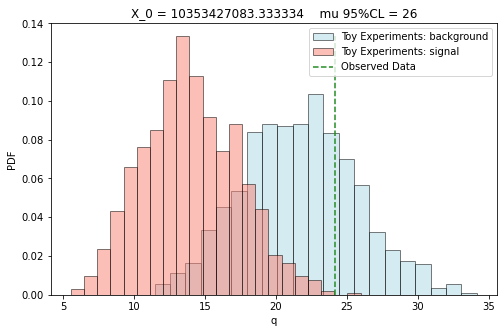

Mu:  67    q(mu)_obs = 153.65335867763565 
p_mu = 0.0   p_b = 0.187   ratio = 0.0 

Mu:  56    q(mu)_obs = 108.53884883687988 
p_mu = 0.0   p_b = 0.187   ratio = 0.0 

Mu:  50    q(mu)_obs = 87.21627947306774 
p_mu = 0.0   p_b = 0.187   ratio = 0.0 

Mu:  44    q(mu)_obs = 68.2152963920762 
p_mu = 0.0   p_b = 0.186   ratio = 0.0 

Mu:  33    q(mu)_obs = 39.41638739144332 
p_mu = 0.0   p_b = 0.186   ratio = 0.0 

Mu:  26    q(mu)_obs = 25.161610345796817 
p_mu = 0.001   p_b = 0.186   ratio = 0.005376344086021506 

Mu:  15    q(mu)_obs = 9.168558907412034 
p_mu = 0.021   p_b = 0.186   ratio = 0.11290322580645162 



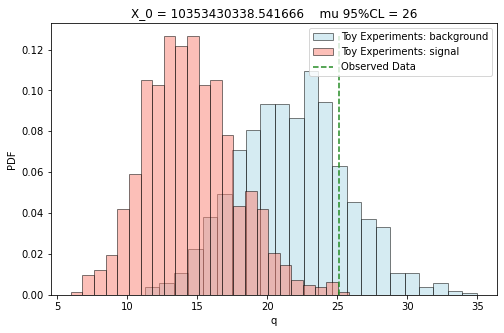

Mu:  67    q(mu)_obs = 154.9710422138453 
p_mu = 0.0   p_b = 0.165   ratio = 0.0 

Mu:  56    q(mu)_obs = 109.44202898239973 
p_mu = 0.0   p_b = 0.165   ratio = 0.0 

Mu:  50    q(mu)_obs = 87.92606804306047 
p_mu = 0.0   p_b = 0.165   ratio = 0.0 

Mu:  44    q(mu)_obs = 68.7548129373929 
p_mu = 0.0   p_b = 0.165   ratio = 0.0 

Mu:  33    q(mu)_obs = 39.70387977090263 
p_mu = 0.002   p_b = 0.165   ratio = 0.012121212121212121 

Mu:  26    q(mu)_obs = 25.32931327918277 
p_mu = 0.003   p_b = 0.165   ratio = 0.01818181818181818 

Mu:  15    q(mu)_obs = 9.211931594168618 
p_mu = 0.02   p_b = 0.165   ratio = 0.12121212121212122 



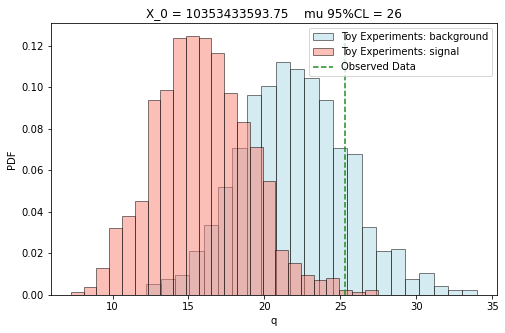

In [30]:
_, muCI = stat.stat_test(run=395, x_0=freq[range(0, 50,5)].values, mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=1000,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')

In [31]:
muCI

array([50., 56., 67., 67., 44., 33., 26., 26., 26., 26.])

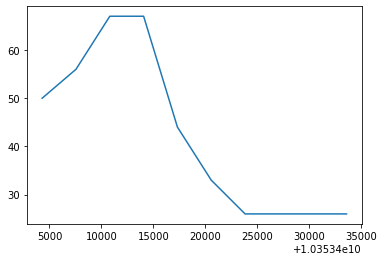

In [32]:
plt.plot(freq[range(0, 50, 5)].values, muCI)

### Mu 95%CL - Run 395

In [10]:
muCI1=np.array([50., 56., 67., 67., 44., 33., 26., 26., 26., 26.])
muCI2=np.array([26., 26., 42., 57., 63., 72., 72., 91., 98., 91.])
muCI3=np.array([80., 95., 95., 85., 75., 65., 65., 50., 35., 30.])
muCI4=np.array([27., 20., 21., 22., 24., 29., 39., 54., 54., 50.])
muCI_40values=np.array([muCI1,muCI2,muCI3,muCI4]).flatten()

freq_test=freq[(range(0,200,5))].values

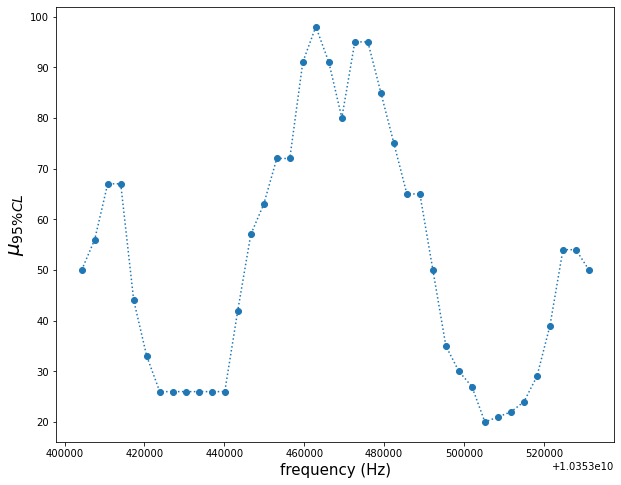

In [11]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.scatter(freq_test,muCI_40values)
ax.plot(freq_test,muCI_40values,linestyle="dotted")
ax.set_xlabel("frequency (Hz)",size=15)
ax.set_ylabel(r'$\mu_{95\%CL}$',size=20)

plt.show()